In [165]:
import numpy as np
import openturns as ot
from dependence import ImpactOfDependence
import matplotlib.pyplot as plt
 
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [166]:
dim = 3
alpha = 0.05 
threshold = 2.
N = 20
n = 20000
measure = "KendallTau"
margins = [ot.Normal()]*dim

families = np.zeros((dim, dim), dtype=int)
families[1, 0] = 1

In [167]:
def add_function(x, a=0.5):
    """
    """
    x = np.asarray(x)
    x = x[np.newaxis] if x.ndim == 1 else x
    w = (np.arange(x.shape[1]) + 1)*a
    return (x*w).sum(axis=1)

In [168]:
impact = ImpactOfDependence(model_func=add_function, margins=margins, families=families)

impact.run(n_dep_param=N, n_input_sample=n, fixed_grid=True, 
           dep_measure=measure, seed=0)

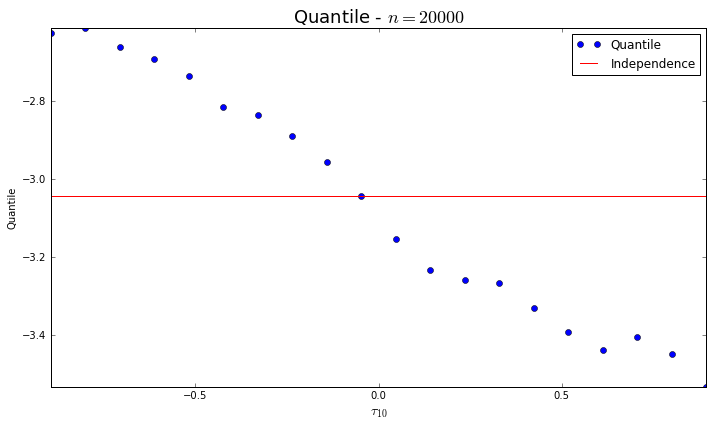

In [169]:
quant_result = impact.compute_quantiles(alpha)
quant_result.draw('KendallTau')

In [175]:
impact = ImpactOfDependence(model_func=add_function, margins=margins, families=families)

quantiles = {}

for i in range(dim):
    for j in range(i):
        families = np.zeros((dim, dim), dtype=int)
        families[i, j] = 1
        impact.families = families
        impact.run(n_dep_param=N, n_input_sample=n, fixed_grid=True, 
                   dep_measure=measure, seed=0)
        
        quant_result = impact.compute_quantiles(alpha)
        quantiles[i, j] = quant_result.quantity
        id_min = quant_result.quantity.argmin()
        print quantiles.min
        

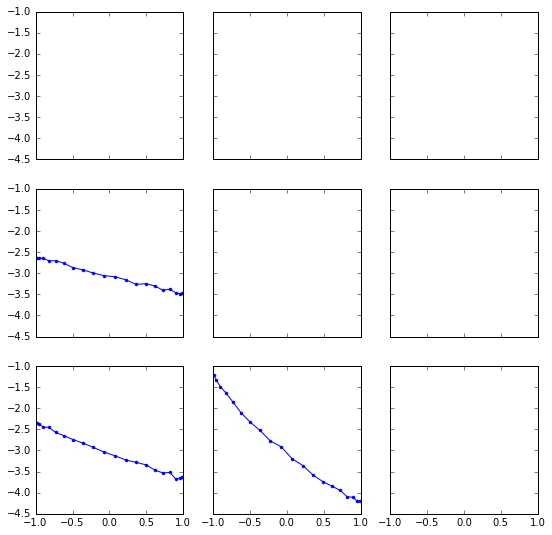

In [182]:
params = quant_result.cond_params
fig, axes = plt.subplots(dim, dim, figsize=(dim*3, dim*3), sharex=True, sharey=True)

for i in range(dim):
    for j in range(i):
        ax = axes[i, j]
        ax.plot(params, quantiles[i, j], '.-')